# Assignment 1 Getting Started Notebook

__Notebook Introduction__. This Jupyter Notebook illustrates organizing assignment work.  It uses some of the features of the [jupyter-contrib-nbextensions package](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html).  For example, you'll see in code cells a red, dashed-line vertical "ruler," marking the 70 character location of lines.

In the following cell will be some code that allows multiple outputs from a single code cell.  You'll see the red ruler in it.  The ruler can be helpful in avoiding code line truncations in a pdf file produced from a Notebook.

__IMPORTANT NOTE__: This Notebook doesn't include all necessary elements of Assignment 1.  It's ok to start your work on Assignment 1 using this Notebook, but you'll need to add a lot to it in order to do a satisfactory job on what the Assignment requires.  Note also that it's expected that you'll use markdown cells throughout to explain things you did, and the results you got.  For example, what does this next code cell do?

In [561]:
# What does this do?
from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The cell above allows for the full output of the code in the cells and to display the HTML version of the notebook

# Assignment Introduction

I'd start off each Notebook which a short summary of what the assignment was about, and what the results are, and what, if any, conclusions I could draw about what I did and the results I got.  This part is something you'd finalize once you're done with what follows.


# Packages

Next I'd import the packages I'm going to use.  At the start I'd usually _not_ be completely sure what packages  I'd end up using.  So this list of imports would be updated as work proceeds.  At the end, it should include just what was necessary to do what follows, and nothing else. 

In [562]:
# note the use of 'consensual' package nicknames.
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
import scipy.stats as stats

In [563]:
# What's this for?
%matplotlib inline

The cell above allows for the plots/graphs to be displayed right below the cell where the plotting commands are written

---
# PART 0

# Importing Data

Here I'm going to read the data from the two csv files I downloaded from Kaggle.com.

In [1]:
# Are the data files in the present working directory for this Notebook?

In [565]:
trainDat = pd.read_csv('train.csv')
testDat =  pd.read_csv('test.csv')

At this point it's useful to take a first peak at some of the data to see how much there is, and also to see whether the testDat and the trainDat have the same features (variables).   Here are the rows and cols of the two data sets.  They should be the same, save for the target to be predicted, _SalePrice_:

In [566]:
trainDat.shape
testDat.shape

(1460, 81)

(1459, 80)

In [567]:
# Is SalePrice not in the test data?
set(trainDat.columns).difference(set(testDat.columns))

{'SalePrice'}

In [568]:
# Are the features in the test data a subset of the train data features?
set(testDat.columns).issubset(set(trainDat.columns))

True

## Split the Data for Hold Out Cross Validation

We're going to do a random 80/20 split of the trainDat data.  The train split will be for model training.  The test split will be for model validation.

These are small data, so here we can work with pd DataFrames.  With more data, we might want to use np arrays.

In [569]:
yDat = trainDat.SalePrice      # Our "Y" variable

XDat = trainDat.loc[:,trainDat.columns!='SalePrice']  # Potential X's

In [570]:
# Random split using a scikit-learn preprocessing method
Xtrain, Xtest, ytrain, ytest = train_test_split( XDat, yDat, \
        train_size=0.8, random_state=9,                      \
         shuffle=True )

_Why would you use the random_state keyword argument, above?  What about **shuffle**?_

Xtrain and ytrain are what you'll use for model training.  xtest and ytest you'll use to validate your models, to find out how well they generalize to data they haven't "learned" from.

Note that the line continuation backslashes above aren't actually necessary.  They are just there to make continuations more obvious. 


The target or y variable is 'SalePrice' and all the other variables are the potential x variables. Random_state was used instead of shuffle in order to be able to recreate the split if needed to.

---

# PART 1 

# EDA

It's usually done to understand the data you've got, what you might need to do _to_ it, and how you might use it to satisfy your overall objective.  Note that it's  not usual for there to be a lot of "cycling" between EDA and cleaning/transformation activities. 

EDA practices vary widely.  One place to start is to explore what types of data you have in the training data, the data you'll use to train and validate your regression models.  You'll be using hold out validation when training you models, so in principle you should only be doing your EDA using the data in Xtrain and ytrain.  

In [571]:
# Data types of the potential features
Xtrain.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In Pandas parlance, a feature or variable of type "object" is a string, or character, variable.

In [572]:
# Data type of the target
ytrain.dtype

dtype('int64')

In [573]:
ytrain.describe()

count      1168.000000
mean     178753.636986
std       78296.025999
min       34900.000000
25%      129000.000000
50%      159697.500000
75%      212000.000000
max      745000.000000
Name: SalePrice, dtype: float64

In [574]:
ytrain.count()
ytrain.isnull().sum()

1168

0

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Sale Price')

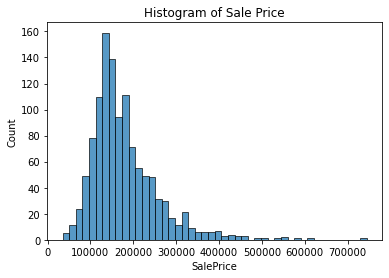

In [575]:
sns.histplot(ytrain)
plt.title('Histogram of Sale Price')

((array([-3.24209521, -2.98025416, -2.83435097, ...,  2.83435097,
          2.98025416,  3.24209521]),
  array([ 34900,  35311,  37900, ..., 582933, 611657, 745000])),
 (73406.19987184141, 178753.6369863014, 0.9356741520717875))

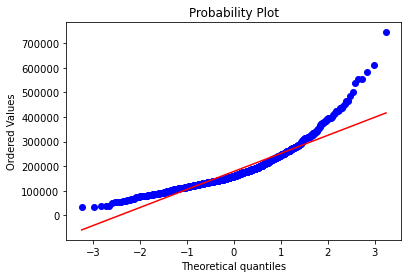

In [576]:
stats.probplot(ytrain, plot=plt)

In [577]:
skew = ytrain.skew()
kurt = ytrain.kurt()
print("Skew: {} /  Kurt: {}".format(skew, kurt))

Skew: 1.7795302613534816 /  Kurt: 5.607798505821057


Based on the histogram and calculated skew and kurt of our target variable, SalePrice, the data is fairly skewed to the right. There is also a high degree of kurtosis as well. A log transformation will need to be performed on Sale Price in order for it to become more normally distributed and help improve the accuracy of the ML model.

In [578]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 1392 to 382
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    960 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overal

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

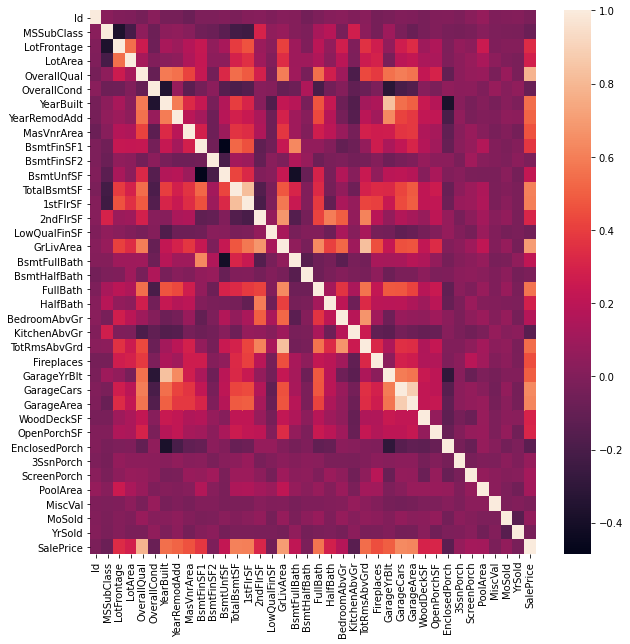

In [579]:
train_corr = Xtrain.copy()
train_corr['SalePrice'] = ytrain
plt.subplots(figsize=(10, 10))
sns.heatmap(train_corr.corr())

In [580]:
train_corr.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.029204,-0.003082,-0.005732,-0.036263,0.027488,-0.034337,-0.037038,-0.074175,-0.011554,...,-0.029651,0.000389,0.007589,-0.014089,0.025752,0.067300,-0.007232,0.001938,0.010738,-0.020511
MSSubClass,0.029204,1.000000,-0.366844,-0.210624,0.046043,-0.067924,0.039732,0.048924,0.022874,-0.056661,...,-0.030076,-0.000830,-0.027708,-0.038248,-0.024409,0.021827,-0.010688,-0.020817,-0.026508,-0.078036
LotFrontage,-0.003082,-0.366844,1.000000,0.552732,0.258648,-0.063624,0.130474,0.091206,0.175153,0.237675,...,0.095165,0.156901,-0.013289,0.062551,0.041552,0.253480,-0.004805,0.009785,0.008143,0.334471
LotArea,-0.005732,-0.210624,0.552732,1.000000,0.125826,0.001777,0.027777,0.045253,0.155020,0.231356,...,0.144149,0.144532,-0.007787,0.038779,0.074281,0.136317,0.038695,-0.005448,-0.023878,0.281523
OverallQual,-0.036263,0.046043,0.258648,0.125826,1.000000,-0.091352,0.584744,0.556531,0.417945,0.236442,...,0.222632,0.302935,-0.105272,0.041393,0.066564,0.083029,-0.025137,0.080633,-0.026551,0.789335
OverallCond,0.027488,-0.067924,-0.063624,0.001777,-0.091352,1.000000,-0.355197,0.072257,-0.130447,-0.042748,...,0.020480,-0.018740,0.053920,0.034410,0.040087,-0.008375,0.071609,0.017667,0.051145,-0.082409
YearBuilt,-0.034337,0.039732,0.130474,0.027777,0.584744,-0.355197,1.000000,0.591593,0.330874,0.239108,...,0.241582,0.180786,-0.380503,0.024320,-0.032875,0.007635,-0.029909,0.022429,-0.014458,0.548451
YearRemodAdd,-0.037038,0.048924,0.091206,0.045253,0.556531,0.072257,0.591593,1.000000,0.192214,0.120636,...,0.222095,0.218381,-0.196056,0.050658,-0.025400,0.000791,-0.008208,0.046901,0.039932,0.517346
MasVnrArea,-0.074175,0.022874,0.175153,0.155020,0.417945,-0.130447,0.330874,0.192214,1.000000,0.285286,...,0.157018,0.129034,-0.112797,0.019518,0.079982,0.014553,-0.029686,0.006971,-0.041093,0.460624
BsmtFinSF1,-0.011554,-0.056661,0.237675,0.231356,0.236442,-0.042748,0.239108,0.120636,0.285286,1.000000,...,0.171607,0.111891,-0.093268,0.026403,0.069491,0.165497,0.003647,-0.018290,0.011407,0.376794


In [581]:
corr_target = train_corr.corr()
strong_numerical = corr_target['SalePrice'][corr_target["SalePrice"] > 0.50]
strong_numerical

OverallQual     0.789335
YearBuilt       0.548451
YearRemodAdd    0.517346
TotalBsmtSF     0.606144
1stFlrSF        0.602790
GrLivArea       0.699250
FullBath        0.566347
TotRmsAbvGrd    0.544250
GarageCars      0.637448
GarageArea      0.628478
SalePrice       1.000000
Name: SalePrice, dtype: float64

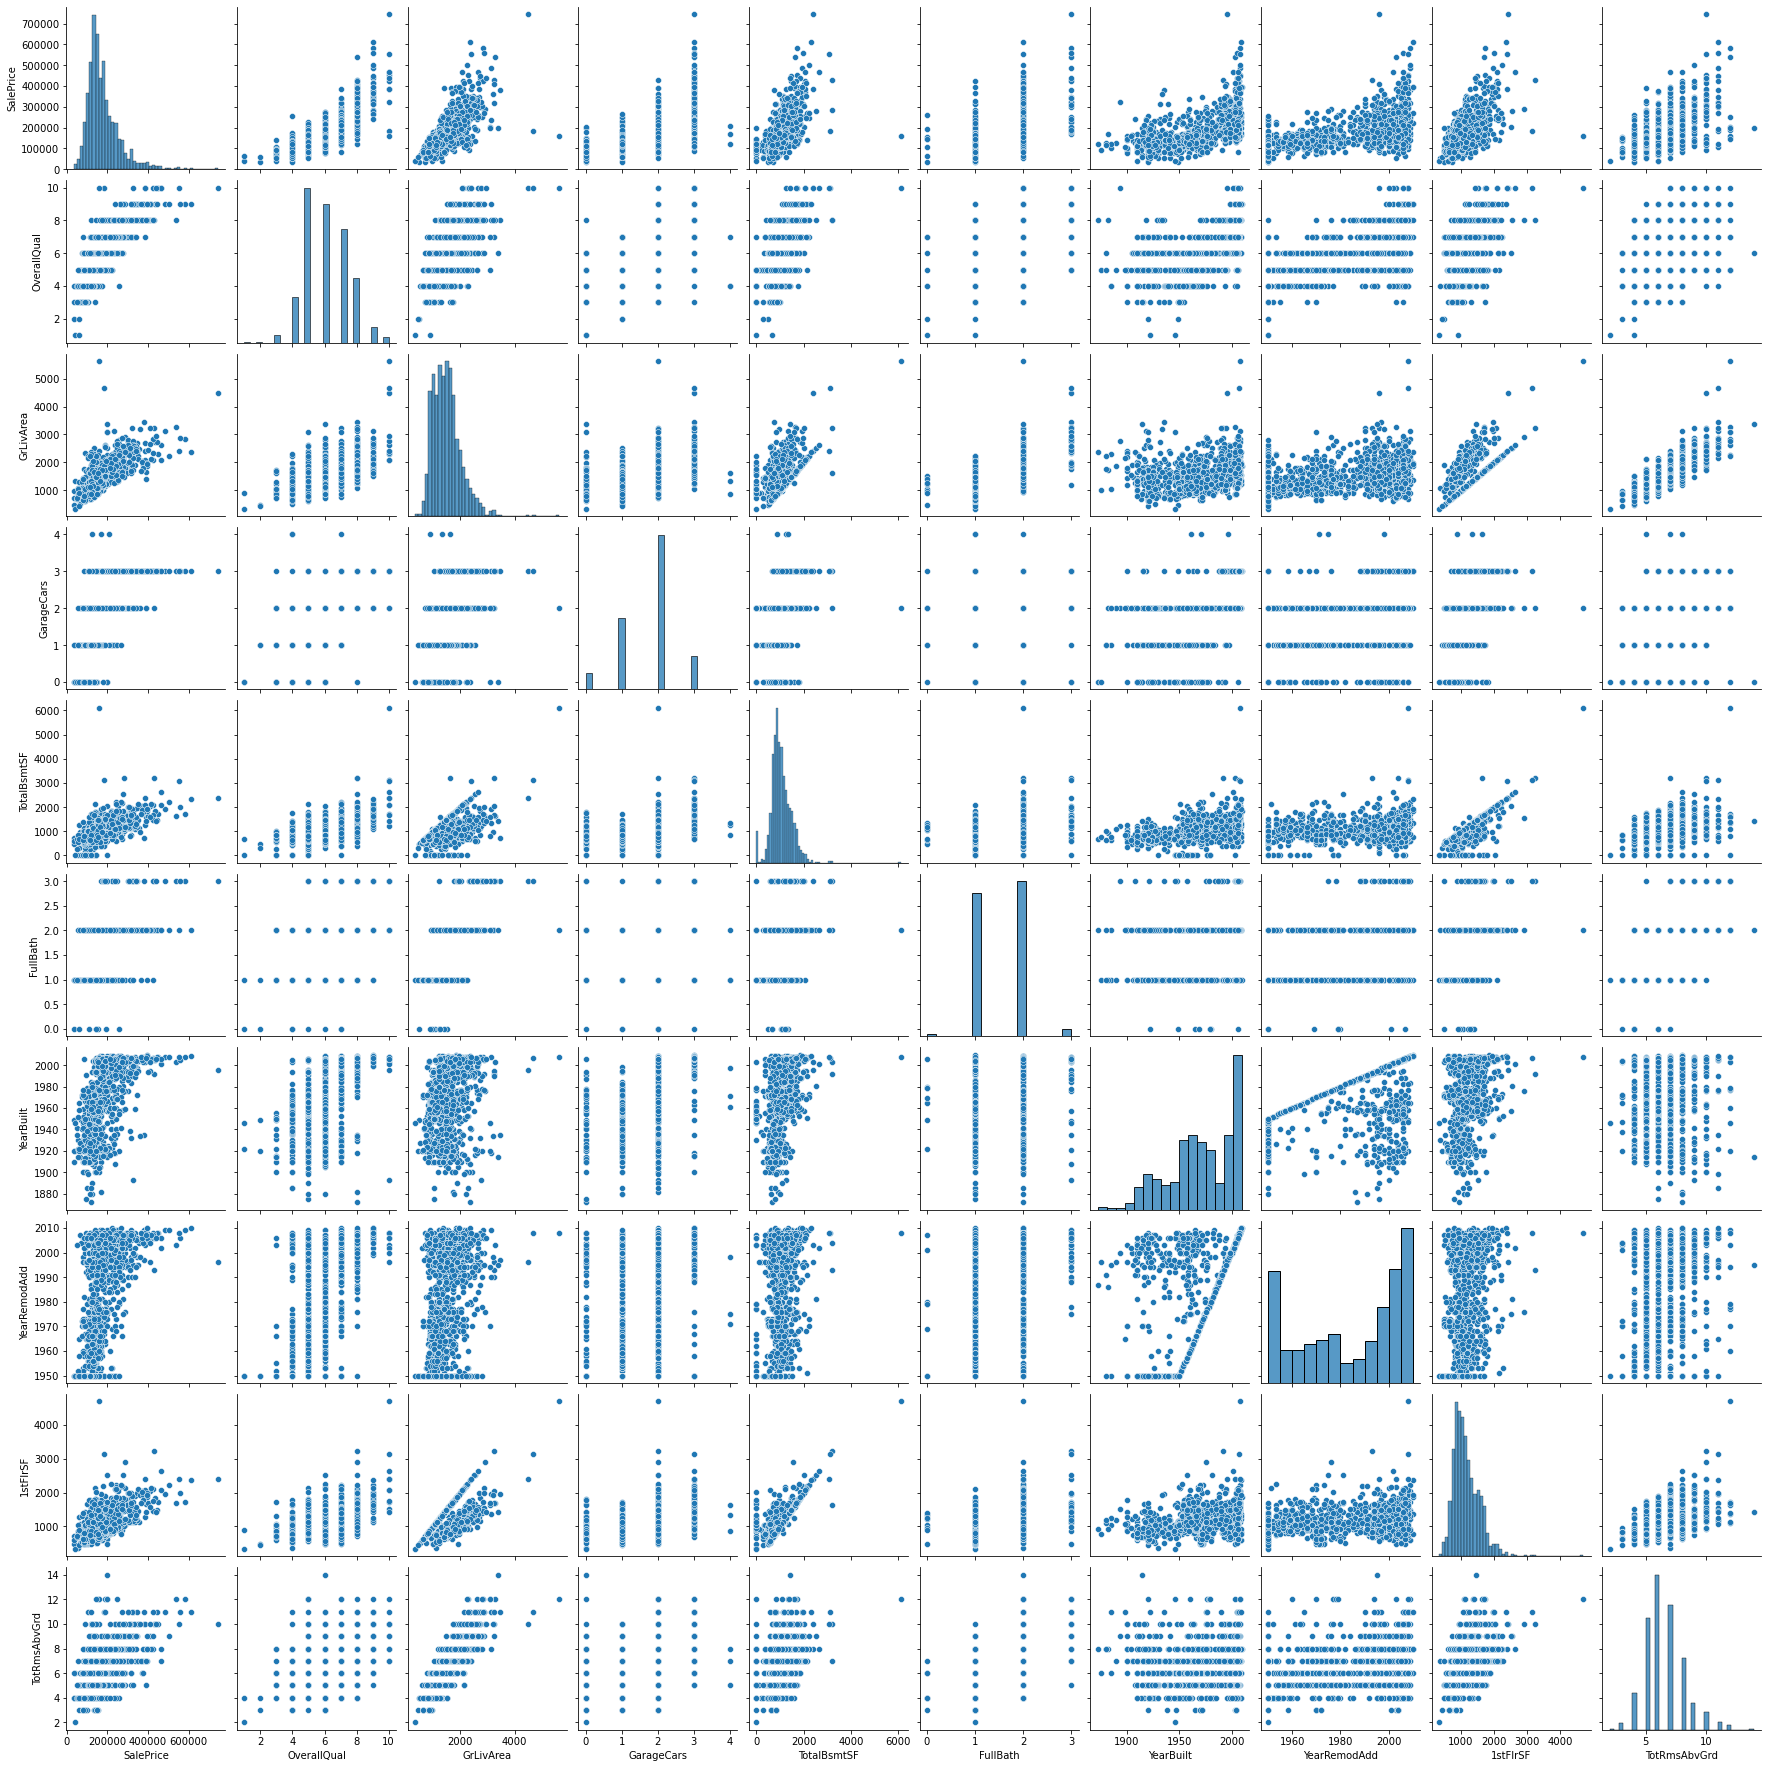

In [582]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'TotRmsAbvGrd']
sns.pairplot(train_corr[cols], height = 2.5)

The correlation of the potential features were displayed on a heat map and the features that have a correlation greater than 0.5 with Sale Price were filtered for. The scatterplots and distribution of those plots were also displayed.

In [583]:
total = train_corr.isnull().sum().sort_values(ascending=False)
percent = (train_corr.isnull().sum()/train_corr.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1162,0.994863
MiscFeature,1122,0.960616
Alley,1091,0.934075
Fence,937,0.802226
FireplaceQu,563,0.482021
LotFrontage,208,0.178082
GarageCond,68,0.058219
GarageType,68,0.058219
GarageYrBlt,68,0.058219
GarageFinish,68,0.058219


The missing values for the features are displayed above. Fortunately none of the features with correlations greater than 0.5 have any missing values so we will not have to account for them in the cleaning process. As seen in the scatterplots and distributions, there are a few outliers and non-normal distributions that will need to be accounted for. 

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

<AxesSubplot:xlabel='Condition2', ylabel='SalePrice'>

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

<AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

<AxesSubplot:xlabel='BsmtExposure', ylabel='SalePrice'>

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

<AxesSubplot:xlabel='GarageQual', ylabel='SalePrice'>

<AxesSubplot:xlabel='GarageCond', ylabel='SalePrice'>

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

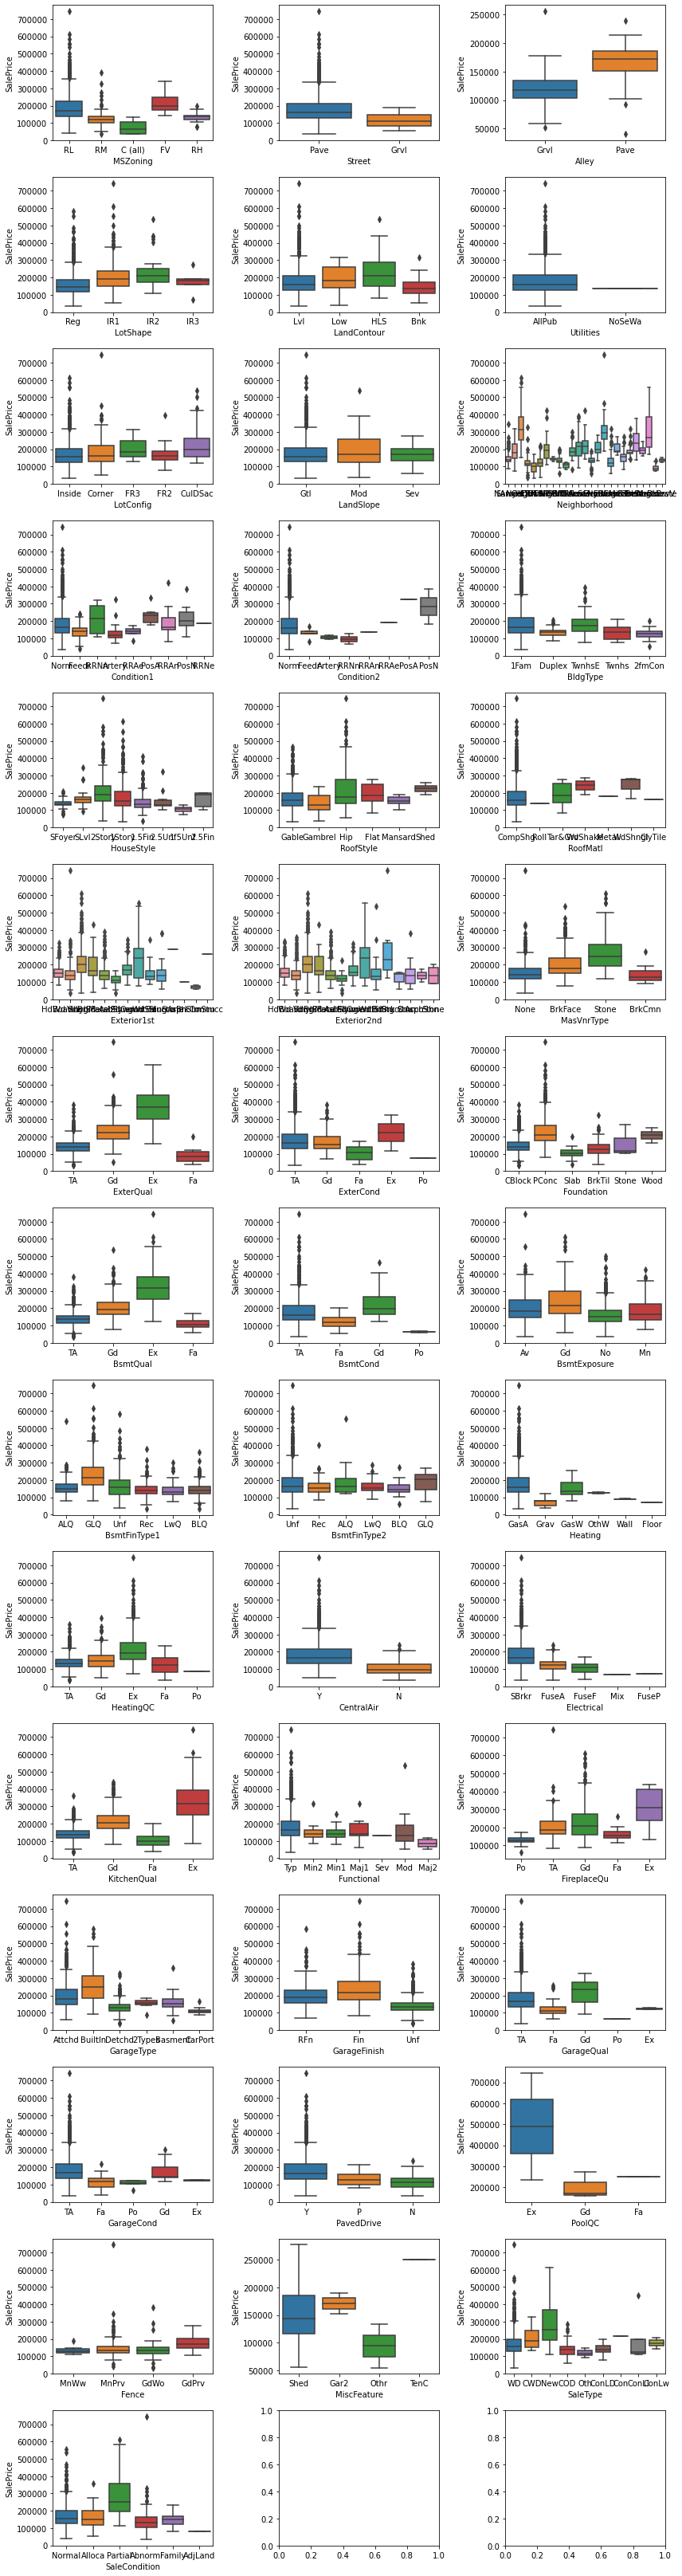

In [584]:
categorical_features = train_corr.dtypes[train_corr.dtypes == "object"].index
list_cat_feats = list(categorical_features)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(list_cat_feats):
            sns.boxplot(x=list_cat_feats[i], y='SalePrice', data= train_corr, ax = axs[r][c])
plt.tight_layout()

In [585]:
strong_categorical = ['ExterQual', 'BsmtQual', 'KitchenQual', 'FireplaceQu', 'MasVnrType', 'MSZoning']

The categorical features that were estimated to have the strongest correlations were collected. The correlation was determined by analyzing the boxplots for minimal overlap.

## Read the Doc

Before going any further, you should review the documentation you have about the data, if you have not already done so.  Take a look at what's in the _data_description.txt_ file.  You need to understand what each variable is supposed to measure to know what it how it should be used, and what values on it are correct. 

## Start to Understand Your Target

_SalePrice_ is the target your models will be trained to predict.  It's apparently an integer-valued variable.  Check it for missing or incorrect values.  Get a look at how it's distributed by plotting a frequency histogram or a density plot. If there are missing values, you'll need to decide what to do about them.  You may want to transform _SalePrice_ in some way if you think it would help your models be more accurate, or to avoid producing illogical predicted values. 

Note: Any graph you include in your final Assignment "work product" (i.e., what you turn in) should have labeled axes, and a descriptive title.  When you make graphs for EDA, you can be flexible about this, assuming that you actually understand what you are graphing.  

## Checking Out Your Potential Features

You have 80 features to work with.  The potential number of features you could use in your regression modeling is quite large if you consider 80 plus possible transformations of them.  It'll be up to you to decide which ones to use.

But to start with, begin by checking the features for missing or incorrect values. 


## Things To Watch Out For

Aside from missing and incorrect values:

* Features with little or no variation.  They won't be able to predict little or nothing.
* Features that are linear functions of other features.  Redundant features won't improve prediction, while adding parameter values to be estimated.

---

# PART 2

## Cleaning, Rescaling, Transforming

Your EDA should have informed you (at least a bit) about what you have to work with, and what needs to be fixed. The activities in this part can be pretty labor-intensive (considerable "slogwork").  It's not usual to find yourself iterating between EDA/data descriptive efforts, and data repair and replacement.

To use the string(type "object") features as predictors, you'll need to recode them in some way.  If a string variable can be thought of as having values that represent mutually exclusive categories, it can be possible to recode it into new data columns of zeros and ones.  See the "OneHotEncoder" in scikit-learn (sclearn.preprocessing), or the Pandas "get_Dummies" method. 

Integer (int64) and continuous Real (float64) features may have missing values that could be imputed.  The science of missing value imputation indicates that how it is best done depends on the mechanisms that result in missingness.  This is a topic outside of the scope of this course.  But if you find missing values and you'd like to impute in some simple way, like by "plugging" with a measure of central tendency, you can do so.  Be sure to explain it.

If there is a lot of missing values on a feature, you may decide not to use it.

Bear in mind that any transformations you do on your training data, you'll also need to do on your validation data, being sure to avoid any risk of data leakage.  You'll also need to do them on the data you'll use for making predictions to upload to Kaggle.com.

It appears that many ML algorithms used for supervised learning problems sometimes "work better" if features are transformed so that their variances, or their ranges, are about the same. You can try that here to see if you can get better model fits.  (Note that it is possible to transform features that are recoded into columns of zeros and ones.)

Once you're satisfied with what you've done on this part (or if you've run out of time or of patience), it's time to move on to some actual model training.

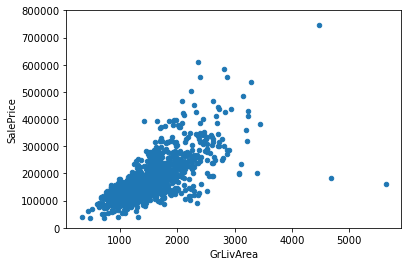

In [586]:
data = pd.concat([train_corr['SalePrice'], train_corr['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

In [587]:
train_corr.sort_values(by = 'GrLivArea', ascending = False)[:2]
Xtrain = Xtrain.drop(Xtrain[Xtrain['Id'] == 1299].index)
Xtrain = Xtrain.drop(Xtrain[Xtrain['Id'] == 524].index)
ytrain = ytrain.drop(1298)
ytrain = ytrain.drop(523)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


The 2 points in the bottom right of the 'GrLivArea' and 'SalePrice' scatterplot were identified as outliers as they do not follow the trend of the plot. They were removed from the Xtrain and ytrain dataframes.

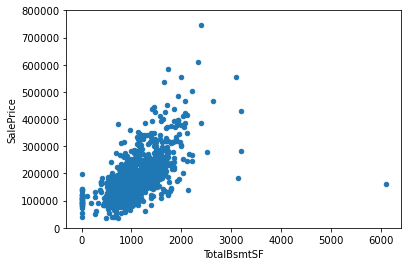

In [588]:
data = pd.concat([train_corr['SalePrice'], train_corr['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

In [589]:
train_corr.sort_values(by = 'TotalBsmtSF', ascending = False)[:1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


The data point above was already removed from the dataframe.

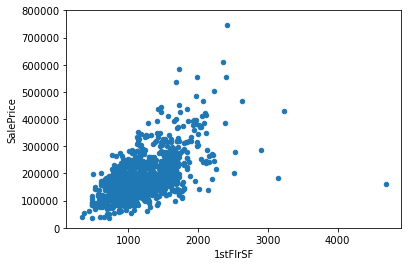

In [590]:
data = pd.concat([train_corr['SalePrice'], train_corr['1stFlrSF']], axis=1)
data.plot.scatter(x='1stFlrSF', y='SalePrice', ylim=(0,800000));

In [591]:
train_corr.sort_values(by = '1stFlrSF', ascending = False)[:1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


The data point above was already removed from the dataframe.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Sale Price')

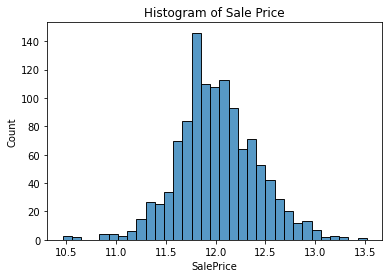

In [592]:
ytrain = np.log(ytrain)
sns.histplot(ytrain)
plt.title('Histogram of Sale Price')

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.27582754,
         13.32392695, 13.5211395 ])),
 (0.40146683242048337, 12.011265076140269, 0.995116627502665))

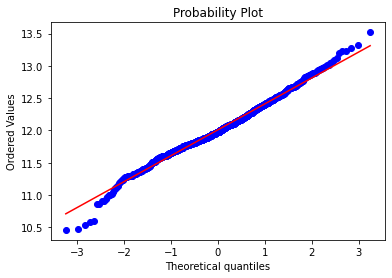

In [593]:
stats.probplot(ytrain, plot=plt)

In [594]:
ytest = np.log(ytest)

The SalePrice data in ytrain was transformed using log transformation in order to represent a more normal distribution. This was also done to ytest.

In [595]:
col_fillna = ['BsmtQual', 'MasVnrType']
for col in col_fillna:
    Xtrain[col].fillna('None',inplace=True)

The missing values(NA) in the categorical values of interest were replaced with 'None'.

In [596]:
dummies_list = ['ExterQual', 'BsmtQual', 'KitchenQual', 'MasVnrType', 'MSZoning']
Xtrain = pd.get_dummies(Xtrain, columns=dummies_list)
Xtest = pd.get_dummies(Xtest, columns=dummies_list)
Xtrain.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,KitchenQual_TA,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
1392,1393,85,68.0,7838,Pave,NaN,Reg,Lvl,AllPub,Inside,...,1,0,0,1,0,0,0,0,1,0
426,427,80,NaN,12800,Pave,NaN,Reg,Low,AllPub,Inside,...,0,0,1,0,0,0,0,0,1,0
321,322,60,99.0,12099,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,1,0,0,0,0,0,1,0
425,426,60,60.0,3378,Pave,Grvl,Reg,HLS,AllPub,Inside,...,1,0,0,1,0,0,0,0,0,1
102,103,90,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,...,1,0,0,1,0,0,0,0,1,0


In [597]:
testDat = pd.get_dummies(testDat, columns=dummies_list)

The strong categorical variables were recoded into new data columns of zeroes, ones, etc. to be able to use them as predictors. This was also done to the testDat.

---
# PART 3

A reasonable place to start here is with a simple model that you can get to work.   It's common practice to start on supervised learning models with a "baseline" model, a very simple model that you can "beat" with better models. In the case of regression, or binary classification, the baseline model could simply predict the mean of the target, or the proportion of positive cases, respectively.  Or, your baseline model may be a model that does more, and is based on previous modeling efforts, perhaps on other data sampled from the same population. 

For this assignment it should suffice to use scikit-learn's _linear_model.LinearRegression_ method.  You need to decide on what model accuracy metrics to use.  LinearRegression 

In [598]:
linReg = linear_model.LinearRegression(n_jobs=-1)  # an instance of the method
# What does n_jobs do?  What are the defaults?

For our example, here, my baseline model will be a regression model that includes an intercept (a default of LinearRegression), "LotArea" in square feet, and "GrLivArea', above ground living area in square feet. Do note that I'm using these features here without doing prerequisite EDA and cleaning; this is an example, right? 

Let's extract from out training features just the columns for our features.

In [599]:
Xtrain0=Xtrain.loc[:,["LotArea","GrLivArea"]]
Xtrain0.columns
Xtest0=Xtest.loc[:,["LotArea","GrLivArea"]]
Xtest0.columns

Index(['LotArea', 'GrLivArea'], dtype='object')

Index(['LotArea', 'GrLivArea'], dtype='object')

This regression method wants numpy arrays as input data.  We'll transform our pd Series and DataFrames, here.  Note that use of the pd method to do this.

In [600]:
# Make some numpy arrays
X=Xtrain0.to_numpy(copy=True)
y=ytrain.to_numpy(copy=True)
Xt=Xtest0.to_numpy(copy=True)
yt=ytest.to_numpy(copy=True)
# What does copy do?

## Baseline Model Training and Validating

In [601]:
# Baseline model training
reg0=linReg.fit(X,y)

## Fit Measures

Check out metrics in scikit-learn for available metrics. 

Here we get $R^2$, the Coefficient of Determination, using the training data, and the test (validation) data.

In [602]:
print('Coefficient of Determination')
R2Train=reg0.score(X,y).round(3)
print(f'Training R2: {R2Train}')
testPred=reg0.predict(Xt)
R2Test=metrics.r2_score(yt,testPred).round(3)
print(f'Test R2: {R2Test}')

Coefficient of Determination
Training R2: 0.533
Test R2: 0.527


### MSE

Mean Squared Error is a commonly used regression metric. Root Mean Squared Error (RMSE) is, as well.

In [603]:
trainPred=reg0.predict(X)
trainMSE=metrics.mean_squared_error(y,trainPred)
testMSE=metrics.mean_squared_error(yt,testPred)
trainRMSE=math.sqrt(trainMSE)
testRMSE=math.sqrt(testMSE)
print(f'training RMSE: {round(trainRMSE,2)}')
print(f'test RMSE: {round(testRMSE,2)}')

training RMSE: 0.28
test RMSE: 0.26


That's our baseline!  Just two features.  Given that the target is left truncated, one of the things to check on in your results is whether you get predicted values that are incorrect.  Note that we didn't check the features for extreme values, something we should have looked into during our EDA. We didn't rescale the features.  You might want to try rescaling them by standardizing each of them, or by MinMax rescaling.  See the methods available in sklearn.preprocessing.

The next thing to do is start adding features to models models up until the test data metrics begin to get worse than the training data metrics.  You obviously can't do this in an exhaustive way because your time is limited.  So you'll need to make some good guesses based on your understanding of the data to try out at least a handful of different models, bearing in mind that your objective is to come up with the best model you can based on the training data that also does about as well on the test data.

It's a good idea to summarize the metrics for all your models in a table so that it's easy to compare them. You should include in your summary of results metrics based on your training data, and metrics based on your test (validation) data. 

When a model's performance is a lot worse on test (validation) data than on training data, what is the likely reason?

In [604]:
strong_numerical

OverallQual     0.789335
YearBuilt       0.548451
YearRemodAdd    0.517346
TotalBsmtSF     0.606144
1stFlrSF        0.602790
GrLivArea       0.699250
FullBath        0.566347
TotRmsAbvGrd    0.544250
GarageCars      0.637448
GarageArea      0.628478
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [605]:
dummies_list

['ExterQual', 'BsmtQual', 'KitchenQual', 'MasVnrType', 'MSZoning']

In [606]:
Xtrain1=Xtrain.loc[:,["OverallQual","GrLivArea",'LotArea', 'ExterQual_Ex', 'KitchenQual_Ex']]
Xtest1=Xtest.loc[:,["OverallQual","GrLivArea",'LotArea', 'ExterQual_Ex','KitchenQual_Ex']]
X=Xtrain1.to_numpy(copy=True)
Xt=Xtest1.to_numpy(copy=True)
reg1=linReg.fit(X,y)
print('Coefficient of Determination')
R2Train=reg1.score(X,y).round(3)
print(f'Training R2: {R2Train}')
testPred=reg1.predict(Xt)
R2Test=metrics.r2_score(yt,testPred).round(3)
print(f'Test R2: {R2Test}')
trainPred=reg1.predict(X)
trainMSE=metrics.mean_squared_error(y,trainPred)
testMSE=metrics.mean_squared_error(yt,testPred)
trainRMSE=math.sqrt(trainMSE)
testRMSE=math.sqrt(testMSE)
print(f'training RMSE: {round(trainRMSE,2)}')
print(f'test RMSE: {round(testRMSE,2)}')

Coefficient of Determination
Training R2: 0.779
Test R2: 0.776
training RMSE: 0.19
test RMSE: 0.18


In [607]:
Xtrain2=Xtrain.loc[:,["TotalBsmtSF","GrLivArea",'LotArea', 'GarageCars']]
Xtest2=Xtest.loc[:,["TotalBsmtSF","GrLivArea",'LotArea', 'GarageCars']]
X=Xtrain2.to_numpy(copy=True)
Xt=Xtest2.to_numpy(copy=True)
reg2=linReg.fit(X,y)
print('Coefficient of Determination')
R2Train=reg1.score(X,y).round(3)
print(f'Training R2: {R2Train}')
testPred=reg2.predict(Xt)
R2Test=metrics.r2_score(yt,testPred).round(3)
print(f'Test R2: {R2Test}')
trainPred=reg2.predict(X)
trainMSE=metrics.mean_squared_error(y,trainPred)
testMSE=metrics.mean_squared_error(yt,testPred)
trainRMSE=math.sqrt(trainMSE)
testRMSE=math.sqrt(testMSE)
print(f'training RMSE: {round(trainRMSE,2)}')
print(f'test RMSE: {round(testRMSE,2)}')

Coefficient of Determination
Training R2: 0.744
Test R2: 0.77
training RMSE: 0.2
test RMSE: 0.18


In [608]:
Xtrain3=Xtrain.loc[:,["ExterQual_Ex","GrLivArea", "LotArea"]]
Xtest3=Xtest.loc[:,["ExterQual_Ex","GrLivArea", "LotArea"]]
X=Xtrain3.to_numpy(copy=True)
Xt=Xtest3.to_numpy(copy=True)
reg3=linReg.fit(X,y)
print('Coefficient of Determination')
R2Train=reg1.score(X,y).round(3)
print(f'Training R2: {R2Train}')
testPred=reg3.predict(Xt)
R2Test=metrics.r2_score(yt,testPred).round(3)
print(f'Test R2: {R2Test}')
trainPred=reg3.predict(X)
trainMSE=metrics.mean_squared_error(y,trainPred)
testMSE=metrics.mean_squared_error(yt,testPred)
trainRMSE=math.sqrt(trainMSE)
testRMSE=math.sqrt(testMSE)
print(f'training RMSE: {round(trainRMSE,2)}')
print(f'test RMSE: {round(testRMSE,2)}')

Coefficient of Determination
Training R2: 0.57
Test R2: 0.575
training RMSE: 0.26
test RMSE: 0.25


In [609]:
Xtrain4=Xtrain.loc[:,["OverallQual","GrLivArea",'LotArea']]
Xtest4=Xtest.loc[:,["OverallQual","GrLivArea",'LotArea']]
X=Xtrain4.to_numpy(copy=True)
Xt=Xtest4.to_numpy(copy=True)
reg4=linReg.fit(X,y)
print('Coefficient of Determination')
R2Train=reg1.score(X,y).round(3)
print(f'Training R2: {R2Train}')
testPred=reg4.predict(Xt)
R2Test=metrics.r2_score(yt,testPred).round(3)
print(f'Test R2: {R2Test}')
trainPred=reg4.predict(X)
trainMSE=metrics.mean_squared_error(y,trainPred)
testMSE=metrics.mean_squared_error(yt,testPred)
trainRMSE=math.sqrt(trainMSE)
testRMSE=math.sqrt(testMSE)
print(f'training RMSE: {round(trainRMSE,2)}')
print(f'test RMSE: {round(testRMSE,2)}')

Coefficient of Determination
Training R2: 0.775
Test R2: 0.764
training RMSE: 0.19
test RMSE: 0.19


In [610]:
from tabulate import tabulate
data = [[1, 0.7790, 0.7760, 0.190, 0.18],
        [2, 0.744, 0.77, 0.2, 0.18],
        [3, 0.57, 0.575, 0.26, 0.25],
        [4, 0.775, 0.764, 0.19, 0.19]]
col_names = ["Model Number","Training R2", "Test R2", "Training RMSE", "Test RMSE"]
print(tabulate(data, headers=col_names))

  Model Number    Training R2    Test R2    Training RMSE    Test RMSE
--------------  -------------  ---------  ---------------  -----------
             1          0.779      0.776             0.19         0.18
             2          0.744      0.77              0.2          0.18
             3          0.57       0.575             0.26         0.25
             4          0.775      0.764             0.19         0.19


An instance of the linear regression method was used to create the machine learning models. Various combinations of features were tested in the models to determine the best model for predicting Sale Price. The coefficient of determination and root mean squared error were used as metrics for the models. After running through various models, it was determined that Model 1 provided the best metrics for predicting Sale Price. It provided the highest coefficient of determination and the lowest RMSE for the training and test data. The training and test results were also very similar for that model. This model will be utilized for creating predictions.

---
# PART 4

Now that you've arrived at the best model you can, given the time you have available, use the predict method, above, to create predictions for the Kaggle test data.  Upload your predictions, screen capture your score(s) (You can submit more than once), and post your screen capture(s) to the Kaggle scoring discussion for this Assignment on Canvas.

In [611]:
Xtrain1=Xtrain.loc[:,["OverallQual","GrLivArea",'LotArea', 'ExterQual_Ex', 'KitchenQual_Ex']]
testDat1=testDat.loc[:,["OverallQual","GrLivArea",'LotArea', 'ExterQual_Ex','KitchenQual_Ex']]
X=Xtrain1.to_numpy(copy=True)
y=ytrain.to_numpy(copy=True)
reg1=linReg.fit(X,y)
testDat_Pred=reg1.predict(testDat1)
testDat_Pred
testDat_Pred_new = np.exp(testDat_Pred)
testDat_Pred_new

array([11.68010577, 11.98166107, 11.88278948, ..., 11.82845041,
       11.68961593, 12.28660407])

array([118196.73618579, 159797.24460916, 144753.77585728, ...,
       137097.88164667, 119326.16846745, 216772.58159288])

In [612]:
submission = pd.DataFrame()
submission['Id'] = testDat['Id']
submission['SalePrice'] = testDat_Pred_new
submission
submission.to_csv('submission.csv',index=False)

,Id,SalePrice
0,1461,118196.736186
1,1462,159797.244609
2,1463,144753.775857
3,1464,165674.752602
4,1465,206849.126697
...,...,...
1454,2915,97029.476384
1455,2916,96997.691021
1456,2917,137097.881647
1457,2918,119326.168467
